In [29]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.utils import to_categorical


In [30]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

array([[[ 54,  31,  18],
        [ 59,  34,  19],
        [ 56,  37,  22],
        ...,
        [133,  92,  53],
        [131,  89,  49],
        [132,  94,  53]],

       [[ 59,  38,  26],
        [ 62,  39,  26],
        [ 55,  36,  25],
        ...,
        [193, 135,  77],
        [200, 144,  86],
        [197, 142,  86]],

       [[ 41,  26,  18],
        [ 41,  25,  16],
        [ 36,  21,  13],
        ...,
        [202, 144,  84],
        [196, 141,  81],
        [190, 136,  79]],

       ...,

       [[105, 161, 157],
        [ 97, 163, 162],
        [ 96, 170, 164],
        ...,
        [ 98, 145, 144],
        [100, 138, 135],
        [100, 130, 123]],

       [[ 86, 149, 143],
        [ 96, 157, 156],
        [ 97, 164, 160],
        ...,
        [ 94, 127, 122],
        [ 98, 126, 120],
        [100, 124, 114]],

       [[ 70, 136, 128],
        [ 92, 146, 145],
        [113, 169, 168],
        ...,
        [ 98, 121, 111],
        [ 96, 117, 106],
        [ 92, 112, 101]]], dtype=uint8)
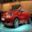

In [31]:
x_train[45]

In [32]:
y_train[45]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
train_generator = train_datagen.flow(x_train, y_train, subset='training')
test_generator = test_datagen.flow(x_test, y_test)
val_generator = train_datagen.flow(x_train, y_train, subset='validation')

In [36]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [37]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,082 (1.17 MB)

 Trainable params: 307,082 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.optimizers import Adam

In [39]:
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
history=model.fit(train_generator,batch_size=64, epochs=10,validation_data=val_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 197s 138ms/step - accuracy: 0.3193 - loss: 1.8248 - val_accuracy: 0.5470 - val_loss: 1.2771
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 201s 138ms/step - accuracy: 0.5845 - loss: 1.1685 - val_accuracy: 0.6488 - val_loss: 0.9910
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 202s 138ms/step - accuracy: 0.6635 - loss: 0.9489 - val_accuracy: 0.6772 - val_loss: 0.9317
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 202s 138ms/step - accuracy: 0.7184 - loss: 0.8099 - val_accuracy: 0.7118 - val_loss: 0.8305
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 196s 139ms/step - accuracy: 0.7497 - loss: 0.7144 - val_accuracy: 0.7084 - val_loss: 0.8598
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 195s 138ms/step - accuracy: 0.7774 - loss: 0.6389 - val_accuracy: 0.7322 - val_loss: 0.7895
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 204s 140ms/step - accuracy: 0.8022 - loss: 0.5699 - val_accuracy: 0.7230 - val_loss: 0.8254
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 202s 140ms/step - accuracy: 0.8